In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv("/Users/dhruviii/Downloads/dataset_DF_data - dataset_DF_data.csv")
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [44]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [46]:
df['date'] = pd.to_datetime(df['date'])

In [49]:

# Aggregate sales by date

df_filtered= df.groupby('date').sum().reset_index()

# Check the resulting dataframe
df_filtered.head()

,date,store,item,sales
0,2013-01-01,2750,12750,13696
1,2013-01-02,2750,12750,13678
2,2013-01-03,2750,12750,14488
3,2013-01-04,2750,12750,15677
4,2013-01-05,2750,12750,16237


In [50]:
df_filtered.set_index('date', inplace=True)

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [81]:
model = SARIMAX(df_filtered['sales'], order=(10, 1, 0), seasonal_order=(1, 1, 1, 12))
sarima_model = model.fit()


/Users/dhruviii/Documents/SEMESTER 3/AI IN MARKETING/aienv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/dhruviii/Documents/SEMESTER 3/AI IN MARKETING/aienv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.39353D+00    |proj g|=  8.36708D-02

At iterate    5    f=  8.38771D+00    |proj g|=  5.24436D-01

At iterate   10    f=  8.34677D+00    |proj g|=  3.56712D-01

At iterate   15    f=  8.33381D+00    |proj g|=  3.73672D-01

At iterate   20    f=  8.31632D+00    |proj g|=  1.00265D-01

At iterate   25    f=  8.31297D+00    |proj g|=  2.98881D-02

At iterate   30    f=  8.31043D+00    |proj g|=  2.76308D-02

At iterate   35    f=  8.30916D+00    |proj g|=  1.05328D-02

At iterate   40    f=  8.30895D+00    |proj g|=  6.80921D-03

At iterate   45    f=  8.30855D+00    |proj g|=  1.89986D-02

At iterate   50    f=  8.30850D+00    |proj g|=  6.56984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/dhruviii/Documents/SEMESTER 3/AI IN MARKETING/aienv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
forecast = sarima_model.forecast(steps=30)

In [83]:
print(forecast)

2018-01-01    18086.401302
2018-01-02    21208.404869
2018-01-03    20888.950645
2018-01-04    22141.294488
2018-01-05    23620.320525
2018-01-06    24868.888996
2018-01-07    26232.244154
2018-01-08    18080.804045
2018-01-09    21195.636429
2018-01-10    20857.352554
2018-01-11    22065.426196
2018-01-12    23474.616886
2018-01-13    24894.517969
2018-01-14    26244.331179
2018-01-15    18300.464880
2018-01-16    21197.180314
2018-01-17    20847.711876
2018-01-18    21867.284762
2018-01-19    23239.125563
2018-01-20    24718.677923
2018-01-21    26110.681111
2018-01-22    18248.875473
2018-01-23    21075.339794
2018-01-24    20763.085438
2018-01-25    21927.593798
2018-01-26    23290.124663
2018-01-27    24827.882982
2018-01-28    26031.039767
2018-01-29    18249.604173
2018-01-30    20856.246133
Freq: D, Name: predicted_mean, dtype: float64


In [84]:
import matplotlib.pyplot as plt

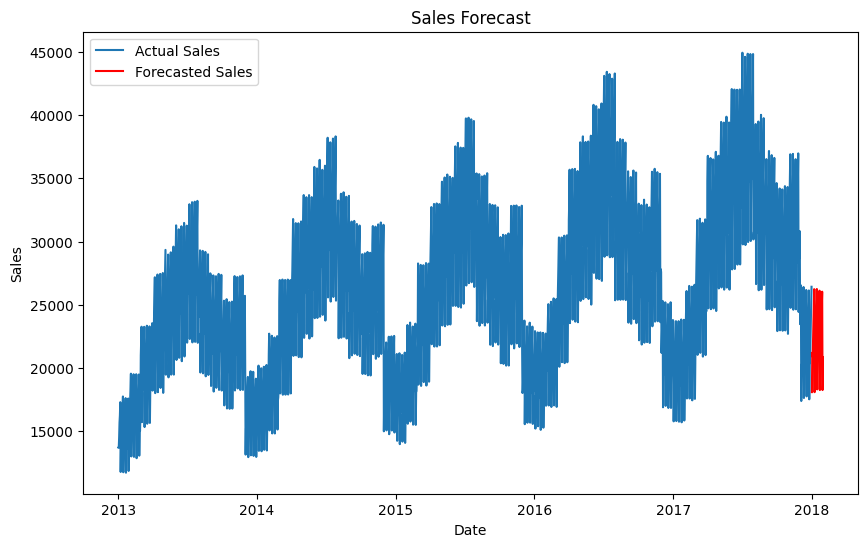

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['sales'], label='Actual Sales')
plt.plot(forecast.index, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
